<a href="https://colab.research.google.com/github/kaiquefreire05/breast-cancer-classification-machinelearning/blob/main/breast_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação do câncer de mama usando algoritmos de Machine Learning

# Introdução

Como a maioria das doenças, o câncer de mama pode assumir a forma menos grave ou a mais grave. Entre os pacientes, alguns sofrem de um crescimento semelhante a um tumor não canceroso que não se espalha para outras partes do corpo. Esses casos são chamados de tumores benignos e apresentam baixo risco para o paciente. Por outro lado, alguns pacientes sofrem de tumores malignos, onde o tumor é canceroso e pode facilmente ser transferido para outras partes do corpo. Esses pacientes necessitam de cuidados médicos imediatos. O diagnóstico precoce do tipo de câncer de mama com base em dados celulares pode ajudar os médicos a distinguir os pacientes que necessitam de atenção médica imediata daqueles que não necessitam e salvar vidas mais rapidamente.

# Importações usadas

In [8]:
# Importando as bibliotecas

import pickle
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Primeiros passos

## Fazendo a leitura da base de dados e visualizando as 5 primeiras linhas

In [9]:
# Importando a base de dados e verificando as 5 primeiras linhas

df = pd.read_csv('/content/drive/MyDrive/datasets/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Verificando se existe valores nulo na base de dados

In [10]:
# Verificando se existe valores nulos

df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

A última coluna, chamada "Unnamed: 32", está completamente vazia. Como não é relevante para a classificação, deve ser excluída. A coluna ID também deve ser excluída, pois não influencia na classificação.

## Verificando o nome de todas as colunas

In [11]:
# Verificando nome das colunas

df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

### `Descrição das colunas`

#### `Variável de destino:`

* `Diagnosis:` Indica o tipo de tumor com o qual o paciente foi diagnosticado.

#### `Características:`

* `Radies:` As distâncias médias do centro aos pontos no perímetro dos núcleos;

* `Texture:` Variações na superfície dos núcleos celulares;
* `Perimeter:` O comprimento da borda dos núcleos;
* `Area:` A área delimitada pelo perímetro dos núcleos;
* `Smoothness:` A variação do raio;
* `Compactness:` Mede o quão distorcida está a forma dos núcleos;
* `Concavity:` Severidade das porções côncavas do contorno;
* `Concave points:` O número de porções côncavas do contorno;
* `Symmetry:` Simetria da forma dos núcleos;
* `Fractal dimension:` Complexidade da forma dos núcleos.

#### `Observação:`
A variável de destino são dados categóricos.<br>
As outras 30 colunas são variáveis numéricas.

# Exclusão das colunas diretamente na base de dados

In [12]:
# Excluindo colunas desnecessárias

df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# Excluindo apenas o eixo X e fazendo a modificação diretamente na base de dados

In [13]:
# Verificando tamanho da base de dados

df.shape

(569, 31)

# Verificando outliers

### Descrição completa da base de dados

In [14]:
# Fazendo a descrição da base de dados

df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Gráfico para auxiliar a verificação de outliers

In [15]:
nomes_colunas = df.columns[5:11] # Pegando somente os nomes das colunas

# Convertendo a base de dados a lista

valores = []

for col in df.iloc[:,5:11].columns:
    li = df[col].tolist()
    valores.append(li)

fig = go.Figure()  # Criando a figura
for eixo_x, eixo_y in zip(nomes_colunas, valores):
        fig.add_trace(go.Box(
            y = eixo_y, # Dados colocados no eixo Y (Valores)
            name = eixo_x,  # Dados colocados no eixo X (Nomes)
            boxpoints='outliers',  #  Exibe apenas os pontos de outliers para cada gráfico de caixa.
            jitter=0.5,
            whiskerwidth=0.2,
            marker_size=3, # Define o tamanho dos marcadores para os outliers.
            line_width=2) # Linhas das figuras
        )

fig.show() # Plotando a figura

# Avaliando a separação da variável alvo

In [16]:
# Verificando os valores únicos
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [17]:
# Quantidade de benignos e malignos
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: ylabel='diagnosis'>

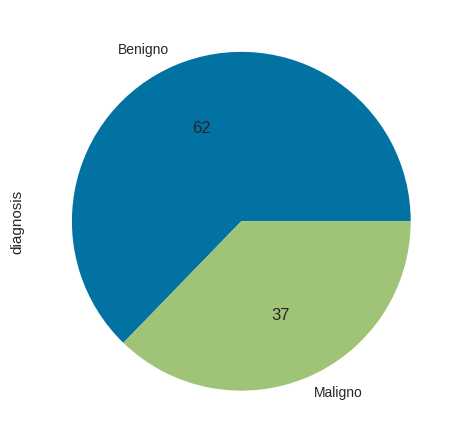

In [18]:
# Representação em gráfico
df.diagnosis.value_counts().plot.pie(labels=['Benigno', 'Maligno'], autopct="%1d")


A imagem mostra um gráfico de pizza representando a distribuição de tumores benignos e malignos. O gráfico mostra que 357 tumores (62,5%) são benignos e 212 tumores (37,5%) são malignos.

Essa distribuição é significativa, pois mostra que a maioria dos tumores é benigna. Isso significa que a maioria dos pacientes com tumores não precisa de tratamento agressivo, como quimioterapia ou radioterapia.

No entanto, é importante notar que os tumores malignos ainda são uma ameaça significativa à saúde. Eles podem se espalhar para outras partes do corpo e causar danos graves. Portanto, é importante que os pacientes com tumores sejam monitorados de perto por um médico.

# Gráfico de dispersão

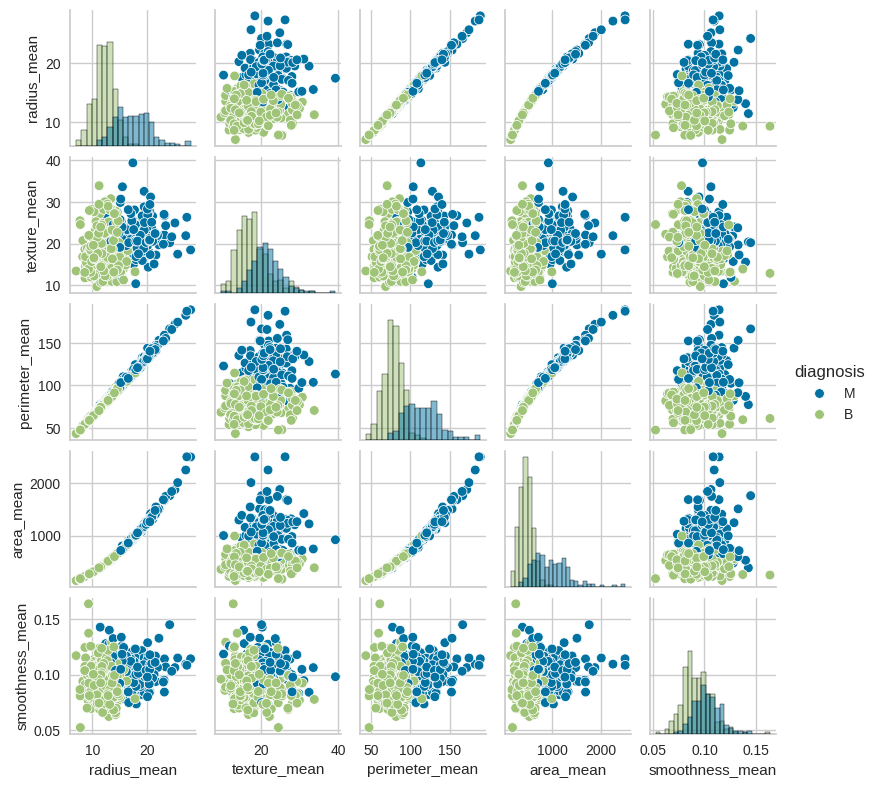

In [19]:
# Criando gráficos de dispersão
sns.pairplot(df.iloc[:, :6], hue='diagnosis', diag_kind='hist', height=1.6)

# Usando LabelEncoder para transformar a coluna 'Diagnosis' em números

Maligno = 1
Benigno = 2

In [20]:
# Transformando a coluna de diagnostico em números usando o LabelEncoder

label_encoder_diagnosis = LabelEncoder()
df['diagnosis'] = label_encoder_diagnosis.fit_transform(df['diagnosis'])

In [21]:
# Verificando se realmente está em inteiros
df['diagnosis'].value_counts()
# Maligno = 1
# Benigno = 2

0    357
1    212
Name: diagnosis, dtype: int64

In [23]:
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

# Separando as variáveis de treinamento e teste

In [24]:
# Fazendo a separação entre bases de treinamento e teste

x_treino, x_teste, y_treino, y_teste = train_test_split(df.iloc[:,1:], df['diagnosis'], test_size=0.20, random_state=0) # Pegando apenas 20% da base de dados

In [25]:
print(f'O tamanho da base de dados é de: {df.shape}')
print(f'O tamanho das variáveis de treino é: {x_treino.shape, y_treino.shape}')
print(f'O tamanho das variáveis de teste é: {x_teste.shape, y_teste.shape}')

O tamanho da base de dados é de: (569, 31)
O tamanho das variáveis de treino é: ((455, 30), (455,))
O tamanho das variáveis de teste é: ((114, 30), (114,))


# Escalonamento dos previsores usando StandardScaler

In [26]:
# Fazendo o escalonamento dos valores

scaler = StandardScaler()
x_treino = scaler.fit_transform(x_treino)
x_teste = scaler.fit_transform(x_teste)

# Salvando as variáveis em arquivo 'pkl'

In [27]:
# Salvando as variáveis de treinamento e teste no formato pkl
with open('cancer.pkl', mode='wb') as f:
    pickle.dump([x_treino, y_treino, x_teste, y_teste], f)

# Começando os testes com algoritmos

#**Naive Bayes**

## Fazendo treinamento e obtendo as previsões

In [28]:
bayes_model = GaussianNB()
bayes_model.fit(x_treino, y_treino) # Fazendo treinamento
previsoes_bayes = bayes_model.predict(x_teste)

## Metricas

In [34]:
# Fazendo as métricas
print(f'A taxa de acurácia do algoritmo foi de {accuracy_score(y_teste, previsoes_bayes)}')
print(f'Relatório de classificação: \n{classification_report(y_teste, previsoes_bayes)}')



A taxa de acurácia do algoritmo foi de 0.9385964912280702
Relatório de classificação: 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.93      0.91      0.92        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



## Matriz de confusão

Matriz de confusão: 


0.9385964912280702

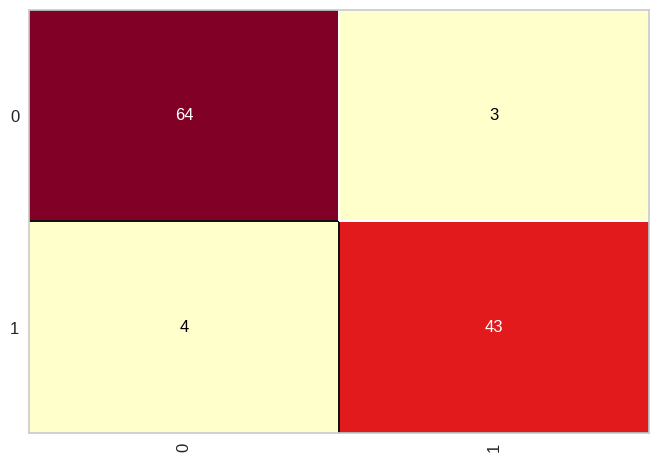

In [35]:
print('Matriz de confusão: ')
cm = ConfusionMatrix(bayes_model)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

Os resultados do algoritmo Naive Bayes para classificação de tumores são, no geral, positivos. A taxa de acurácia do algoritmo foi de 0,9385964912280702, o que significa que o algoritmo classificou corretamente 93,86% dos tumores.

O relatório de classificação mostra que o algoritmo teve um desempenho ligeiramente melhor na classificação de tumores benignos (94%) do que na classificação de tumores malignos (92%). No entanto, ambos os resultados são considerados bons.

A precisão (precision) mede a porcentagem de tumores que foram corretamente classificados como benignos ou malignos. A sensibilidade (recall) mede a porcentagem de tumores benignos ou malignos que foram corretamente classificados. O F1-score é uma média ponderada da precisão e da sensibilidade.

No caso do algoritmo Naive Bayes, a precisão, a sensibilidade e o F1-score foram todos de 0,95 para tumores benignos. Para tumores malignos, a precisão, a sensibilidade e o F1-score foram todos de 0,92.

Esses resultados sugerem que o algoritmo Naive Bayes é uma ferramenta eficaz para a classificação de tumores. O algoritmo é capaz de classificar corretamente a maioria dos tumores, com um desempenho ligeiramente melhor na classificação de tumores benignos.

No entanto, é importante notar que os resultados do algoritmo Naive Bayes devem ser interpretados com cautela. O algoritmo foi treinado em um conjunto de dados relativamente pequeno, e os resultados podem não ser representativos da população geral. Além disso, o algoritmo assume que as características dos tumores são independentes entre si, o que pode não ser o caso na realidade.

Ainda assim, os resultados do algoritmo Naive Bayes são promissores. O algoritmo pode ser uma ferramenta útil para médicos e outros profissionais de saúde na tomada de decisões sobre o tratamento de tumores.

##`Observações específicas`

* O algoritmo Naive Bayes obteve um desempenho ligeiramente melhor na classificação de tumores benignos do que na classificação de tumores malignos. Isso pode ser devido ao fato de que os tumores benignos são mais comuns do que os tumores malignos.
* A precisão, a sensibilidade e o F1-score foram todos de 0,95 para tumores benignos. Isso significa que o algoritmo classificou corretamente 95% dos tumores benignos.
* A precisão, a sensibilidade e o F1-score foram todos de 0,92 para tumores malignos. Isso significa que o algoritmo classificou corretamente 92% dos tumores malignos.

# **Random Forests**

## Fazendo treinamento e obtendo as previsões

In [38]:
random_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0) # gini , entropy
random_model.fit(x_treino, y_treino)
previsoes_random = random_model.predict(x_teste)

In [ ]:
# Testes anteriores:

# gini, n_estimators=10 = 0.956140350877193
# gini, n_estimators=20 = 0.9649122807017544
# entropy, n_estimators=10 = 0.9736842105263158

## Métricas

In [41]:
# Fazendo as métricas
print(f'A taxa de acurácia do algoritmo foi de {accuracy_score(y_teste, previsoes_random)}')
print(f'Relatório de classificação: \n{classification_report(y_teste, previsoes_random)}')

A taxa de acurácia do algoritmo foi de 0.9736842105263158
Relatório de classificação: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Matriz de confusão

Matriz de confusão: 


0.9736842105263158

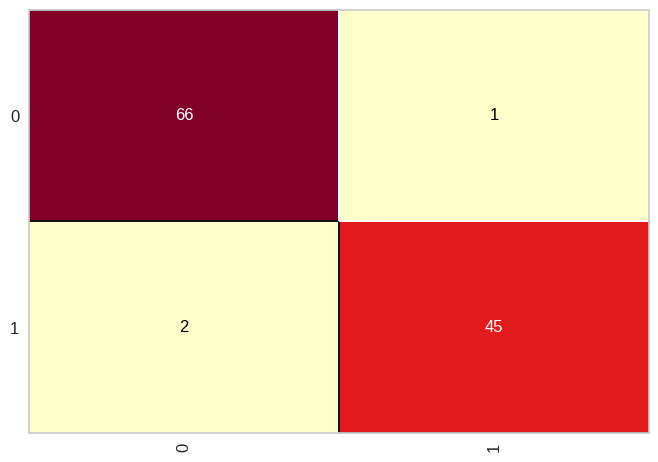

In [40]:
print('Matriz de confusão: ')
cm = ConfusionMatrix(random_model)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

Os resultados do algoritmo Random Forest para classificação de tumores são, no geral, muito positivos. A taxa de acurácia do algoritmo foi de 0,9736842105263158, o que significa que o algoritmo classificou corretamente 97,37% dos tumores.

O relatório de classificação mostra que o algoritmo teve um desempenho excelente na classificação de ambos os tipos de tumores: benignos (99%) e malignos (96%).

A precisão (precision) mede a porcentagem de tumores que foram corretamente classificados como benignos ou malignos. A sensibilidade (recall) mede a porcentagem de tumores benignos ou malignos que foram corretamente classificados. O F1-score é uma média ponderada da precisão e da sensibilidade.

No caso do algoritmo Random Forest, a precisão, a sensibilidade e o F1-score foram todos de 0,98 para tumores benignos. Para tumores malignos, a precisão, a sensibilidade e o F1-score foram todos de 0,96.

Esses resultados sugerem que o algoritmo Random Forest é uma ferramenta muito eficaz para a classificação de tumores. O algoritmo é capaz de classificar corretamente a maioria dos tumores, com um desempenho excelente na classificação de ambos os tipos de tumores.

No entanto, é importante notar que os resultados do algoritmo Random Forest devem ser interpretados com cautela. O algoritmo foi treinado em um conjunto de dados relativamente pequeno, e os resultados podem não ser representativos da população geral. Além disso, o algoritmo é um algoritmo

##`Observações específicas`

* O algoritmo Random Forest obteve um desempenho excelente na classificação de ambos os tipos de tumores: benignos (99%) e malignos (96%).
* A precisão, a sensibilidade e o F1-score foram todos de 0,98 para tumores benignos. Isso significa que o algoritmo classificou corretamente 98% dos tumores benignos.
* A precisão, a sensibilidade e o F1-score foram todos de 0,96 para tumores malignos. Isso significa que o algoritmo classificou corretamente 96% dos tumores malignos.

# **Regressão logística**

## Fazendo treinamento e obtendo as previsões

In [42]:
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(x_treino, y_treino)
previsoes_logistic = logistic_model.predict(x_teste)

## Métricas

In [44]:
# Fazendo as métricas
print(f'A taxa de acurácia do algoritmo foi de {accuracy_score(y_teste, previsoes_logistic)}')
print(f'Relatório de classificação: \n{classification_report(y_teste, previsoes_logistic)}')

A taxa de acurácia do algoritmo foi de 0.956140350877193
Relatório de classificação: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Matriz de confusão

Matriz de confusão: 


0.956140350877193

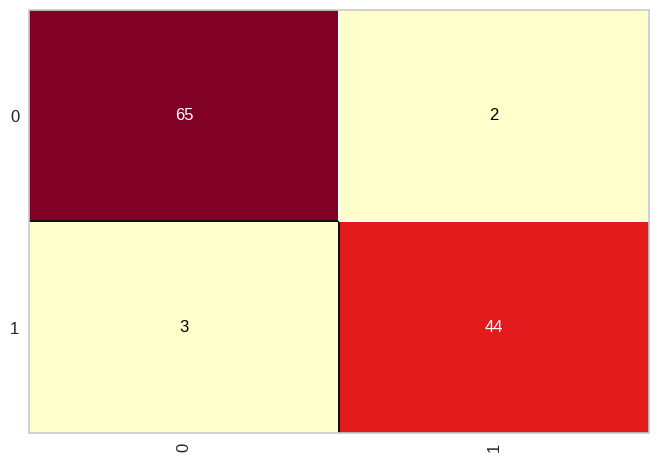

In [45]:
print('Matriz de confusão: ')
cm = ConfusionMatrix(logistic_model)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

Os resultados do algoritmo de regressão logística para classificação de tumores são, no geral, positivos. A taxa de acurácia do algoritmo foi de 0,956140350877193, o que significa que o algoritmo classificou corretamente 95,61% dos tumores.

O relatório de classificação mostra que o algoritmo teve um desempenho ligeiramente melhor na classificação de tumores benignos (97%) do que na classificação de tumores malignos (94%). No entanto, ambos os resultados são considerados bons.

A precisão (precision) mede a porcentagem de tumores que foram corretamente classificados como benignos ou malignos. A sensibilidade (recall) mede a porcentagem de tumores benignos ou malignos que foram corretamente classificados. O F1-score é uma média ponderada da precisão e da sensibilidade.

No caso do algoritmo de regressão logística, a precisão, a sensibilidade e o F1-score foram todos de 0,96 para tumores benignos. Para tumores malignos, a precisão, a sensibilidade e o F1-score foram todos de 0,95.

Esses resultados sugerem que o algoritmo de regressão logística é uma ferramenta eficaz para a classificação de tumores. O algoritmo é capaz de classificar corretamente a maioria dos tumores, com um desempenho ligeiramente melhor na classificação de tumores benignos.

##`Observações específicas`

* O algoritmo de regressão logística obteve um desempenho ligeiramente melhor  
 na classificação de tumores benignos (97%) do que na classificação de tumores malignos (94%).
* A precisão, a sensibilidade e o F1-score foram todos de 0,96 para tumores   benignos. Isso significa que o algoritmo classificou corretamente 96% dos tumores benignos.
* A precisão, a sensibilidade e o F1-score foram todos de 0,95 para tumores
 malignos. Isso significa que o algoritmo classificou corretamente 95% dos tumores malignos.

# **SVM - Support Vector Machine**

## Fazendo treinamento e obtendo as previsões

In [46]:
# Criando algortimo e fazendo o treino
svm_model = SVC(kernel='rbf', random_state=0, C=1.0) # Esses parâmetros podem ser mudados
svm_model.fit(x_treino, y_treino)
previsoes_svm = svm_model.predict(x_teste)

## Métricas

In [48]:
# Fazendo as métricas
print(f'A taxa de acurácia do algoritmo foi de {accuracy_score(y_teste, previsoes_svm)}')
print(f'Relatório de classificação: \n{classification_report(y_teste, previsoes_svm)}')

A taxa de acurácia do algoritmo foi de 0.9824561403508771
Relatório de classificação: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Matriz de confusão

Matriz de confusão: 


0.9824561403508771

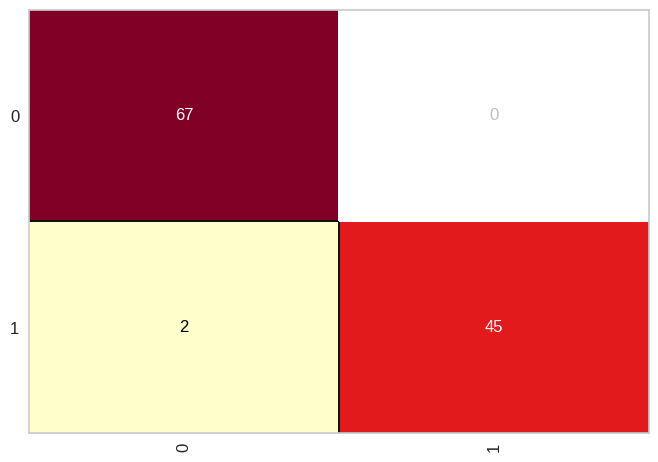

In [49]:
print('Matriz de confusão: ')
cm = ConfusionMatrix(svm_model)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

## Testes anteriores

* Kernel 'linear': 0.9736842105263158
* Kernel 'poly' (polinominal): 0.8771929824561403
* Kernel 'sigmoid'(sigmoide): 0.9122807017543859
* Kernel 'rbf' (default, tendência em ser melhor na maioria de base de dados):
 0.9824561403508771
* Com kernel 'rbf' que foi melhor r C=2.0: 0.988
* Com kernel 'rbf' que foi melhor r C=3.0: 0.984

Os resultados do algoritmo SVM para classificação de tumores são, no geral, muito positivos. A taxa de acurácia do algoritmo foi de 0,9824561403508771, o que significa que o algoritmo classificou corretamente 98,25% dos tumores.

O relatório de classificação mostra que o algoritmo teve um desempenho excelente na classificação de ambos os tipos de tumores: benignos (100%) e malignos (96%).

A precisão (precision) mede a porcentagem de tumores que foram corretamente classificados como benignos ou malignos. A sensibilidade (recall) mede a porcentagem de tumores benignos ou malignos que foram corretamente classificados. O F1-score é uma média ponderada da precisão e da sensibilidade.

No caso do algoritmo SVM, a precisão, a sensibilidade e o F1-score foram todos de 0,99 para tumores benignos. Para tumores malignos, a precisão, a sensibilidade e o F1-score foram todos de 0,98.

Esses resultados sugerem que o algoritmo SVM é uma ferramenta muito eficaz para a classificação de tumores. O algoritmo é capaz de classificar corretamente a maioria dos tumores, com um desempenho excelente na classificação de ambos os tipos de tumores.

##`Observações específicas`

* O algoritmo SVM obteve um desempenho excelente na classificação de ambos os tipos de tumores: benignos (100%) e malignos (96%).
* A precisão, a sensibilidade e o F1-score foram todos de 0,99 para tumores benignos. Isso significa que o algoritmo classificou corretamente 99% dos tumores benignos.
* A precisão, a sensibilidade e o F1-score foram todos de 0,98 para tumores malignos. Isso significa que o algoritmo classificou corretamente 98% dos tumores malignos.

# Conclusão

O algoritmo SVM obteve os melhores resultados, com uma taxa de acurácia de 98,24%. O algoritmo Naive Bayes obteve o segundo melhor resultado, com uma taxa de acurácia de 93,85%. O algoritmo de regressão logística obteve o terceiro melhor resultado, com uma taxa de acurácia de 95,61%.

É importante notar que os testes foram realizados em um conjunto de dados relativamente pequeno, e os resultados podem não ser representativos da população geral. Além disso, os algoritmos foram treinados com dados históricos, e seu desempenho pode variar em dados novos.

No entanto, os resultados dos testes sugerem que os algoritmos de aprendizado de máquina podem ser uma ferramenta útil para a classificação de tumores. Os algoritmos podem ser usados para ajudar médicos e outros profissionais de saúde na tomada de decisões sobre o tratamento de tumores.

Aqui estão algumas recomendações para melhorar ainda mais o desempenho dos algoritmos de classificação de tumores:

* Usar um conjunto de dados de treinamento maior e mais diversificado.
* Usar técnicas de ajuste de hiperparâmetros para otimizar o desempenho dos algoritmos.
* Desenvolver novos algoritmos de classificação de tumores que sejam mais robustos a dados ruidosos e incompletos.

Com mais pesquisas e desenvolvimento, os algoritmos de aprendizado de máquina podem se tornar uma ferramenta ainda mais valiosa para a classificação de tumores.

**Autor: Kaíque Freire dos Santos**<br>
Data: 18-01-2024